# Plotting and Spectrum Generation Options

This is a script that demonstrates the variety of generation and plotting
options available through `LRSpectrum`. `lrspectrum` must be installed (or a
symbolic link to `../lrspectrum` must be included in the
calling directory)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lrspectrum import LRSpectrum

The first thing we do is create a LRSpectrum object

In [2]:
lr = LRSpectrum('example_ammonia.log', name='Ammonia')

## Spectrum Generation Options

The default options for gen_spect choose a fairly standard broadening level,
attempt to automatically define an appropriate frequency range, and assume that
a lorentzian lineshape is desired. All of these options can be manually
specified.

### Broadening Parameters

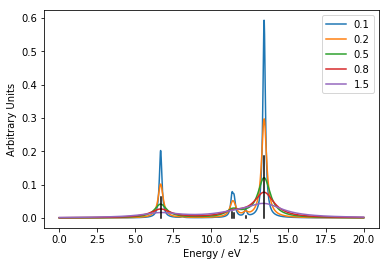

In [3]:
wlim = (0, 20)  # Frequency range in eV

# Here we define a list of broadening levels so we can plot them
broad = [0.1, 0.2, 0.5, 0.8, 1.5]

# Keeping lorentzian and default resolution for now
for b in broad:
    lr.gen_spect(wlim=wlim, broad=b)
    # Do not plot roots (sticks=False)
    lr.plot(sticks=False)

plt.legend(broad)

# Add sticks then show all
lr.plot(doSpect=False, show=True)

### Lorentzian vs Gaussian Lineshape

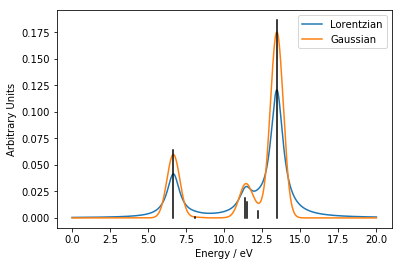

In [4]:
lr.gen_spect(wlim=wlim)
lr.plot(sticks=False)

lr.gen_spect(wlim=wlim, meth='gaussian')
lr.plot()

plt.legend(['Lorentzian', 'Gaussian'])
plt.show()

### Increasing Resolution

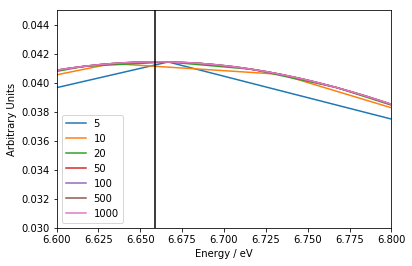

In [5]:
res = [5, 10, 20, 50, 100, 500, 1000]

for r in res:
    lr.gen_spect(wlim=wlim, res=r)
    lr.plot(sticks=False)

plt.legend(res)
# xlim and ylim set limits on the plotting axes
lr.plot(xlim=(6.6, 6.8), ylim=(0.03, 0.045), doSpect=False, show=True)

## Plotting Options

We have already seen `doSpect`, `sticks`, and `show`. The other options are:

|   Name   |           Description           | Default |
|   :---   |              :---               | :--- |
|`xLabel`  |Label on x-axis                  |`'Energy / eV'` |
|`yLabel`  |Label on y-axis                  |`'Arbitrary Units'` |
|`ax`      |Axis on which to place the plot  |Current axes |

For example, if we were to want to plot the spectrum in nm rather than eV,
(although integration of this feature is planned) we could do:

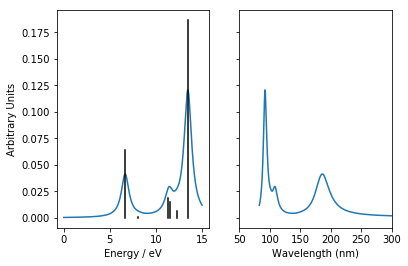

In [6]:
fig, axs = plt.subplots(ncols=2, sharey=True)
lr.gen_spect(wlim=(0.001, 15))
lr.plot(ax=axs[0])

# Constant is h*c in eV*nm
lr.freq = np.divide(1239.842*np.ones(lr.freq.shape), lr.freq)
lr.plot(ax=axs[1], yLabel=None, xLabel='Wavelength (nm)', xlim=(50, 300),
        sticks=False, show=True)

### Using matplotlib options
In addition to the explicit plotting options given as arguments, any other
matplotlib.pyplot options can be passed into LRSpectrum.plot. This is useful
for changing formatting.

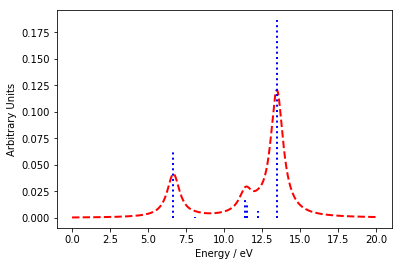

In [7]:
lr.gen_spect(wlim=wlim)
lr.plot(sticks=False, lw=2, color='r', ls='--')
lr.plot(doSpect=False, lw=2, color='b', ls=':', show=True)